In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn import datasets
from sklearn.pipeline import Pipeline
from scipy.stats import uniform

import itertools

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
#from keras.layers import AvgPool2D, BatchNormalization, Reshape
from keras.optimizers import Adadelta, RMSprop, Adam
from keras.losses import categorical_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import tensorflow as tf
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn import datasets
print(train.keys())

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
y=train["label"]
X=train.drop(["label"],axis=1)
X_test=test

In [5]:
X=X/255.0
X_test=X_test/255.0
# for best performance, especially of the NN classfiers,
# set mode = "commit"
mode = "edit"
mode = "commit"
#

if mode == "edit" :
    nr_samples = 1200

if mode == "commit" :    
    nr_samples = 30000

y_train=y[:nr_samples]
X_train=X[:nr_samples]
start_ix_val = nr_samples 
end_ix_val = nr_samples + int(nr_samples/3)
y_val=y[start_ix_val:end_ix_val]
X_val=X[start_ix_val:end_ix_val]
    
print("nr_samples train data:", nr_samples)
print("start_ix_val:", start_ix_val)
print("end_ix_val:", end_ix_val)

nr_samples train data: 30000
start_ix_val: 30000
end_ix_val: 40000


In [6]:
print("X:")
print(X.info())
print("_"*50)
print("X_test:")
print(X_test.info())
print("_"*50)
print("y:")
print(y.shape)

X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 251.2 MB
None
__________________________________________________
X_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 167.5 MB
None
__________________________________________________
y:
(42000,)


In [7]:
X.iloc[0:5,:]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y.iloc[0:10]

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

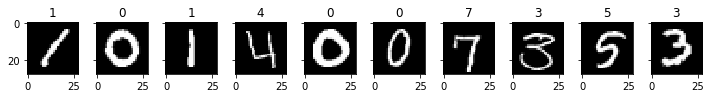

In [9]:
fig, axs = plt.subplots(1, 10,sharex=True, sharey=True, figsize=(10,10))
axs = axs.flatten()
for i in range(0,10):
    im = X.iloc[i]
    im = im.values.reshape(-1,28,28,1)
    axs[i].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'),interpolation='nearest')
    axs[i].set_title(y[i])
plt.tight_layout()    


In [10]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

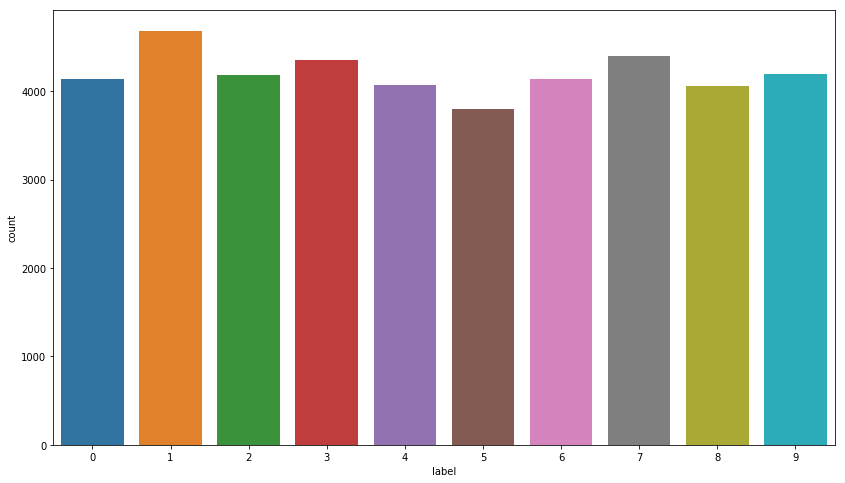

In [11]:
fig,ax=plt.subplots(figsize=(14,8))
g=sns.countplot(y)

In [12]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

In [13]:
from sklearn.linear_model import Perceptron
clf_Perceptron = Perceptron(random_state=0)
param_grid = { 'penalty': ['l1','l2'], 'tol': [0.05, 0.1] }
GridCV_Perceptron = GridSearchCV(clf_Perceptron, param_grid, verbose=1, cv=5)
GridCV_Perceptron.fit(X_train,y_train)
score_grid_Perceptron = get_best_score(GridCV_Perceptron)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.1min finished


0.8588
{'penalty': 'l1', 'tol': 0.1}
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=0, shuffle=True, tol=0.1,
      validation_fraction=0.1, verbose=0, warm_start=False)


In [14]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))
    
    return acc_sc

In [15]:
pred_val_perc= GridCV_Perceptron.predict(X_val)
acc_perc = print_validation_report(y_val, pred_val_perc)

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       998
           1       0.92      0.95      0.94      1127
           2       0.81      0.88      0.85       967
           3       0.82      0.88      0.85      1060
           4       0.88      0.91      0.90       914
           5       0.92      0.70      0.79       914
           6       0.97      0.85      0.91       951
           7       0.94      0.86      0.90      1066
           8       0.81      0.84      0.82       995
           9       0.79      0.90      0.84      1008

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy : 0.8763


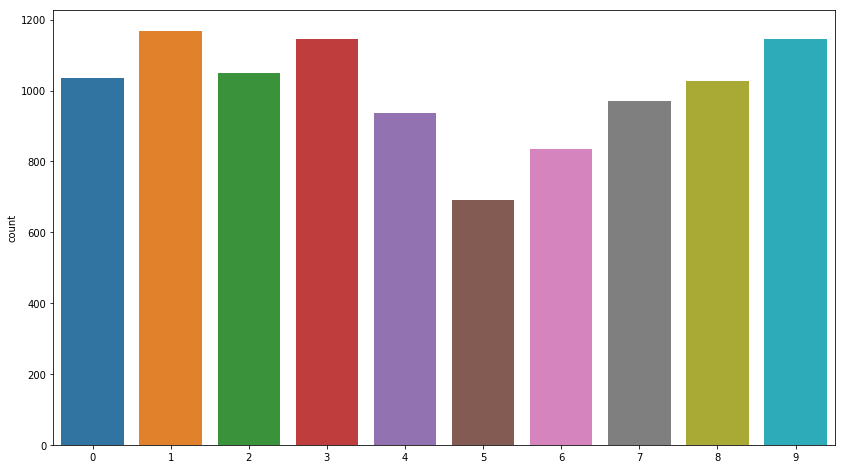

In [16]:
fig,ax=plt.subplots(figsize=(14,8))
g=sns.countplot(pred_val_perc)

In [17]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

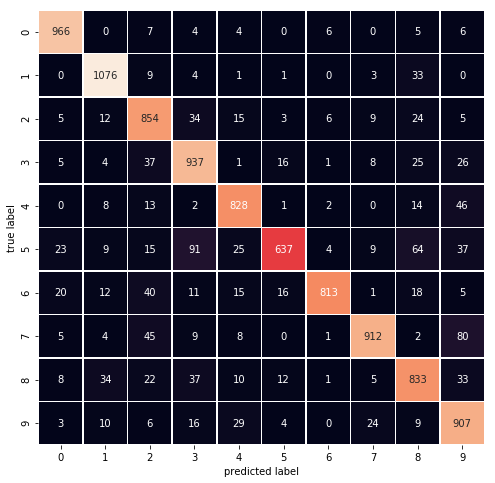

In [18]:
plot_confusion_matrix(y_val, pred_val_perc)

In [19]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(random_state=0)
param_grid = {'C': [0.014,0.012], 'multi_class': ['multinomial'],  
              'penalty': ['l1'],'solver': ['saga'], 'tol': [0.1] }
GridCV_LR = GridSearchCV(clf_LR, param_grid, verbose=1, cv=5)
GridCV_LR.fit(X_train,y_train)
score_grid_LR = get_best_score(GridCV_LR)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished


0.8724
{'C': 0.014, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.1}
LogisticRegression(C=0.014, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=0, solver='saga',
          tol=0.1, verbose=0, warm_start=False)


In [20]:
pred_val_lr = GridCV_LR.predict(X_val)
acc_lr = print_validation_report(y_val, pred_val_lr)

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       998
           1       0.87      0.98      0.92      1127
           2       0.88      0.87      0.88       967
           3       0.87      0.84      0.86      1060
           4       0.86      0.90      0.88       914
           5       0.84      0.79      0.82       914
           6       0.90      0.92      0.91       951
           7       0.90      0.89      0.90      1066
           8       0.89      0.80      0.84       995
           9       0.84      0.83      0.83      1008

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy : 0.8785


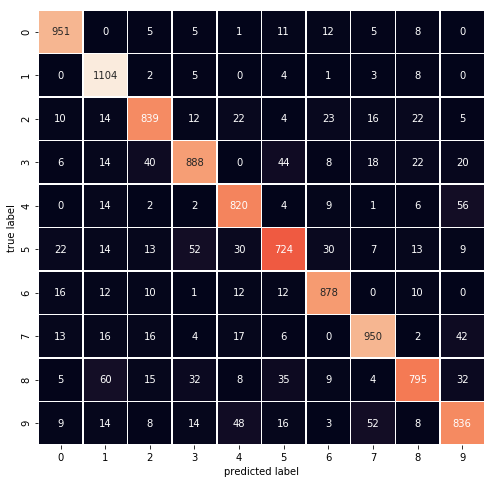

In [21]:
plot_confusion_matrix(y_val, pred_val_lr)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [23]:
pred_val_knn = clf_knn.predict(X_val)
acc_knn = print_validation_report(y_val, pred_val_knn)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       998
           1       0.93      1.00      0.96      1127
           2       0.98      0.95      0.97       967
           3       0.97      0.96      0.97      1060
           4       0.98      0.96      0.97       914
           5       0.96      0.96      0.96       914
           6       0.97      0.99      0.98       951
           7       0.95      0.97      0.96      1066
           8       0.99      0.92      0.95       995
           9       0.95      0.94      0.94      1008

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Accuracy : 0.9638


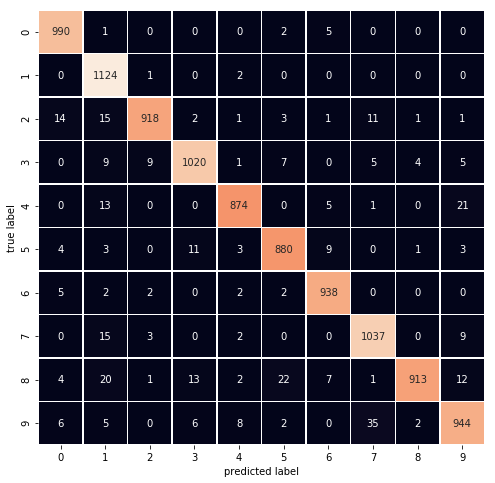

In [24]:
plot_confusion_matrix(y_val, pred_val_knn)

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(random_state=0)
param_grid = {'max_depth': [15], 'max_features': [100],  
              'min_samples_split': [5],'n_estimators' : [50] }
GridCV_RF = GridSearchCV(clf_RF, param_grid, verbose=1, cv=5)
GridCV_RF.fit(X_train,y_train)
score_grid_RF = get_best_score(GridCV_RF)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished


0.9543666666666667
{'max_depth': 15, 'max_features': 100, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [26]:
pred_val_rf = GridCV_RF.predict(X_val)

In [27]:
acc_rf = print_validation_report(y_val, pred_val_rf)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       998
           1       0.97      0.99      0.98      1127
           2       0.95      0.97      0.96       967
           3       0.96      0.93      0.94      1060
           4       0.96      0.96      0.96       914
           5       0.97      0.96      0.96       914
           6       0.97      0.97      0.97       951
           7       0.96      0.96      0.96      1066
           8       0.95      0.95      0.95       995
           9       0.93      0.93      0.93      1008

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Accuracy : 0.9596


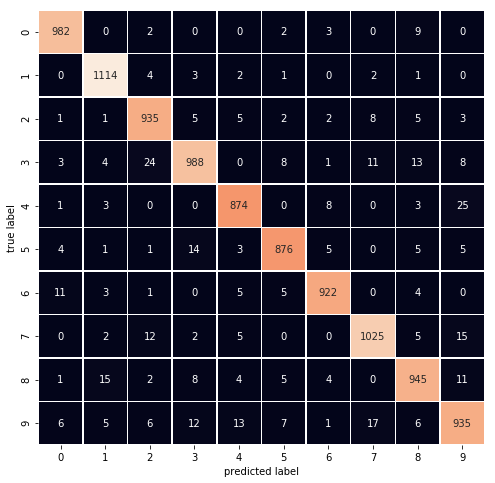

In [28]:
plot_confusion_matrix(y_val, pred_val_rf)

In [29]:
from sklearn.svm import SVC
clf_svm = SVC(C=5, gamma=0.05, kernel='rbf', random_state=0)
clf_svm.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
pred_val_svm = clf_svm.predict(X_val)
acc_svm = print_validation_report(y_val, pred_val_svm)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       998
           1       0.99      0.99      0.99      1127
           2       0.97      0.99      0.98       967
           3       0.98      0.97      0.98      1060
           4       0.98      0.97      0.98       914
           5       0.98      0.98      0.98       914
           6       0.99      0.99      0.99       951
           7       0.98      0.98      0.98      1066
           8       0.98      0.98      0.98       995
           9       0.98      0.96      0.97      1008

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy : 0.9808


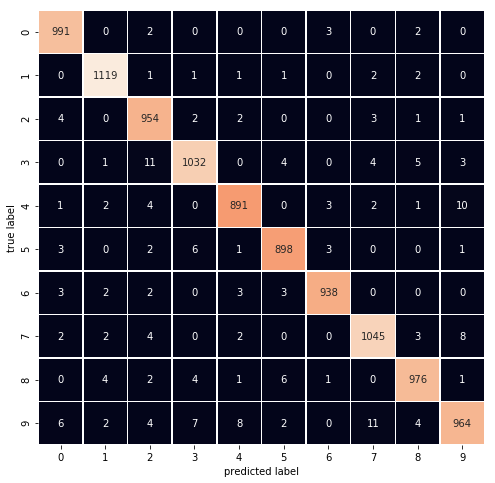

In [31]:
plot_confusion_matrix(y_val, pred_val_svm)

In [32]:
batchsize = int(nr_samples/15) 

In [33]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(activation = "logistic", hidden_layer_sizes=(200,), random_state=0)
param_grid = { 'batch_size' : [batchsize] , 'max_iter': [600], 'alpha': [1e-4], 
               'solver': ['sgd'], 'learning_rate_init': [0.05,0.06],'tol': [1e-4] }
    
GridCV_MLP = GridSearchCV(clf_mlp, param_grid, verbose=1, cv=3)
GridCV_MLP.fit(X_train,y_train)
score_grid_MLP = get_best_score(GridCV_MLP)   

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 31.8min finished


0.9497
{'alpha': 0.0001, 'batch_size': 2000, 'learning_rate_init': 0.06, 'max_iter': 600, 'solver': 'sgd', 'tol': 0.0001}
MLPClassifier(activation='logistic', alpha=0.0001, batch_size=2000,
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.06, max_iter=600, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


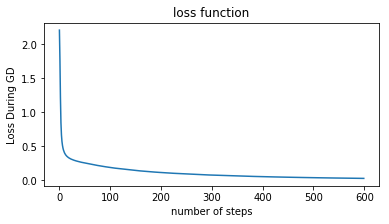

In [34]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(GridCV_MLP.best_estimator_.loss_curve_)

plt.xlabel("number of steps") 
plt.ylabel("Loss During GD")
plt.title("loss function")
plt.show()

In [35]:
pred_val_mlp = GridCV_MLP.predict(X_val)

In [36]:
acc_mlp= print_validation_report(y_val, pred_val_mlp)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       998
           1       0.98      0.99      0.98      1127
           2       0.98      0.97      0.98       967
           3       0.97      0.97      0.97      1060
           4       0.97      0.97      0.97       914
           5       0.97      0.96      0.97       914
           6       0.97      0.98      0.98       951
           7       0.97      0.97      0.97      1066
           8       0.97      0.97      0.97       995
           9       0.96      0.95      0.95      1008

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy : 0.9723


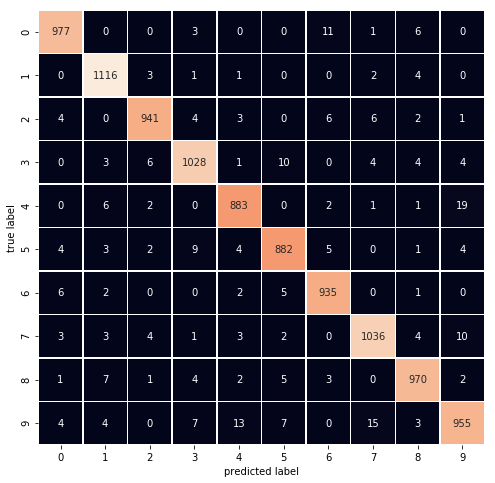

In [37]:
plot_confusion_matrix(y_val, pred_val_mlp)

In [38]:
y_train = to_categorical(y_train, 10)
y_val_10 = to_categorical(y_val, 10)

In [39]:
def dense_model_0():
    model = Sequential()
    model.add(Dense(10, input_dim=784, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [40]:
model_dense_0 = dense_model_0()
model_dense_0.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_dense_0.fit(X_train, y_train, epochs=50, batch_size=batchsize)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
30000/30000 [==============================] - 4s 132us/step - loss: 2.0839 - acc: 0.2786
Epoch 2/50
30000/30000 [==============================] - 1s 27us/step - loss: 1.5352 - acc: 0.6586
Epoch 3/50
30000/30000 [==============================] - 1s 27us/step - loss: 1.1851 - acc: 0.7701
Epoch 4/50
30000/30000 [==============================] - 1s 27us/step - loss: 0.9716 - acc: 0.8057
Epoch 5/50
30000/30000 [==============================] - 1s 27us/step - loss: 0.8372 - acc: 0.8267
Epoch 6/50
30000/30000 [==============================] - 1s 27us/step - loss: 0.7463 - acc: 0.8390
Epoch 7/50
30000/30000 [==============================] - 1s 27us/step - loss: 0.6811 - acc: 0.8494
Epoch 8/50
30000/30000 [==============================] - 1s 27us/step - loss: 0.6317 - acc: 0.8577
Epoch 9/50
30000/30000 [==============================] - 1s 27us/step - loss: 0.5928 - acc: 0.8625
Epoch 10/50
30000/30000 [==========================

In [42]:
pred_val_dense0 = model_dense_0.predict_classes(X_val)
acc_fc0 = print_validation_report(y_val, pred_val_dense0)

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       998
           1       0.93      0.98      0.95      1127
           2       0.91      0.89      0.90       967
           3       0.91      0.89      0.90      1060
           4       0.92      0.93      0.92       914
           5       0.91      0.85      0.88       914
           6       0.93      0.95      0.94       951
           7       0.93      0.92      0.93      1066
           8       0.88      0.88      0.88       995
           9       0.88      0.89      0.89      1008

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000

Accuracy : 0.9157


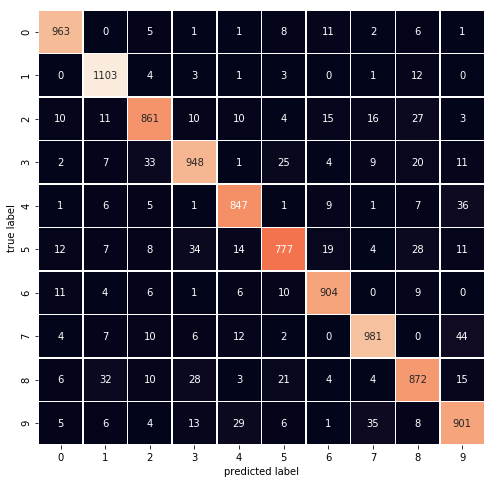

In [43]:
plot_confusion_matrix(y_val, pred_val_dense0)

In [44]:
def dense_model_1():
    model = Sequential()
    model.add(Dense(100, input_dim=784, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [45]:
model_dense_1 = dense_model_1()
model_dense_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [46]:
history_dense_1 = model_dense_1.fit(X_train, y_train, validation_data=(X_val,y_val_10), 
                                    epochs=50, batch_size=batchsize)

Train on 30000 samples, validate on 10000 samples
Epoch 1/50
30000/30000 [==============================] - 1s 37us/step - loss: 1.7334 - acc: 0.5084 - val_loss: 1.0970 - val_acc: 0.7606
Epoch 2/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.8069 - acc: 0.8058 - val_loss: 0.5832 - val_acc: 0.8474
Epoch 3/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.5068 - acc: 0.8644 - val_loss: 0.4286 - val_acc: 0.8817
Epoch 4/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.4031 - acc: 0.8893 - val_loss: 0.3643 - val_acc: 0.8970
Epoch 5/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.3523 - acc: 0.9023 - val_loss: 0.3281 - val_acc: 0.9083
Epoch 6/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.3210 - acc: 0.9107 - val_loss: 0.3022 - val_acc: 0.9152
Epoch 7/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.2979 - acc: 0.9167 - val_loss: 0.2836 - val_acc

In [47]:
def plot_history_loss_and_acc(history_keras_nn):

    fig, axs = plt.subplots(1,2, figsize=(12,4))

    axs[0].plot(history_keras_nn.history['loss'])
    axs[0].plot(history_keras_nn.history['val_loss'])
    axs[0].set_title('model loss')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'], loc='upper left')

    axs[1].plot(history_keras_nn.history['acc'])
    axs[1].plot(history_keras_nn.history['val_acc'])
    axs[1].set_title('model accuracy')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'], loc='upper left')

    plt.show()

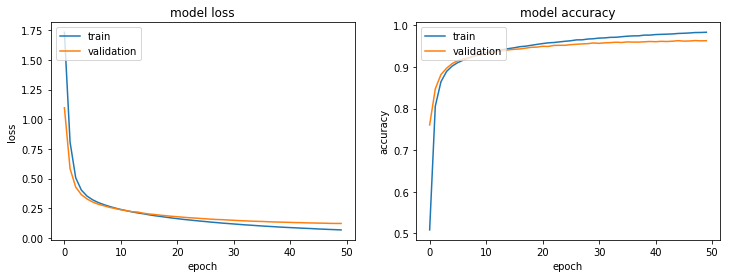

In [48]:
plot_history_loss_and_acc(history_dense_1)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       998
           1       0.97      0.99      0.98      1127
           2       0.97      0.96      0.96       967
           3       0.97      0.95      0.96      1060
           4       0.95      0.96      0.95       914
           5       0.95      0.96      0.95       914
           6       0.96      0.98      0.97       951
           7       0.97      0.98      0.97      1066
           8       0.95      0.96      0.96       995
           9       0.95      0.93      0.94      1008

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

0.9631


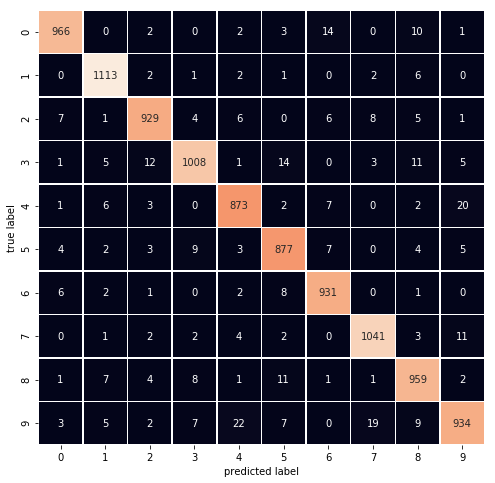

In [49]:
pred_val_dense1 = model_dense_1.predict_classes(X_val)
plot_confusion_matrix(y_val, pred_val_dense1)
print(classification_report(y_val, pred_val_dense1))
acc_fc1 = accuracy_score(y_val, pred_val_dense1)
print(acc_fc1)

In [50]:
def dense_model_2():
    model = Sequential()
    model.add(Dense(100, input_dim=784, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [51]:
model_dense_2 = dense_model_2()
model_dense_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
Total params: 100,710
Trainable params: 100,710
Non-trainable params: 0
_________________________________________________________________


In [52]:
history_dense_2 = model_dense_2.fit(X_train, y_train, validation_data=(X_val,y_val_10), 
                                    epochs=50, batch_size=batchsize)

Train on 30000 samples, validate on 10000 samples
Epoch 1/50
30000/30000 [==============================] - 1s 41us/step - loss: 1.7486 - acc: 0.5699 - val_loss: 1.0072 - val_acc: 0.7898
Epoch 2/50
30000/30000 [==============================] - 1s 30us/step - loss: 0.6632 - acc: 0.8358 - val_loss: 0.4335 - val_acc: 0.8750
Epoch 3/50
30000/30000 [==============================] - 1s 30us/step - loss: 0.3814 - acc: 0.8887 - val_loss: 0.3179 - val_acc: 0.9070
Epoch 4/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.3028 - acc: 0.9104 - val_loss: 0.2672 - val_acc: 0.9208
Epoch 5/50
30000/30000 [==============================] - 1s 30us/step - loss: 0.2615 - acc: 0.9241 - val_loss: 0.2395 - val_acc: 0.9310
Epoch 6/50
30000/30000 [==============================] - 1s 30us/step - loss: 0.2357 - acc: 0.9336 - val_loss: 0.2185 - val_acc: 0.9355
Epoch 7/50
30000/30000 [==============================] - 1s 30us/step - loss: 0.2124 - acc: 0.9397 - val_loss: 0.2025 - val_acc

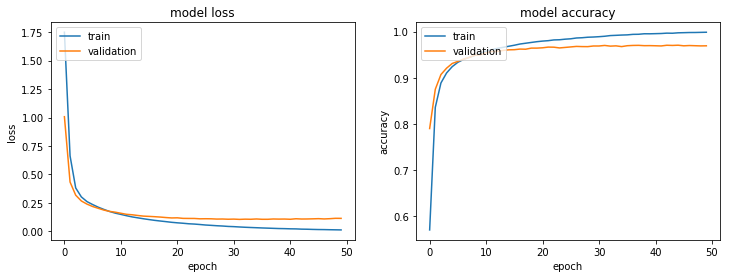

In [53]:
plot_history_loss_and_acc(history_dense_2)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       998
           1       0.98      0.99      0.98      1127
           2       0.97      0.97      0.97       967
           3       0.98      0.96      0.97      1060
           4       0.96      0.96      0.96       914
           5       0.97      0.96      0.97       914
           6       0.97      0.98      0.97       951
           7       0.97      0.98      0.97      1066
           8       0.96      0.97      0.96       995
           9       0.96      0.94      0.95      1008

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

0.9693


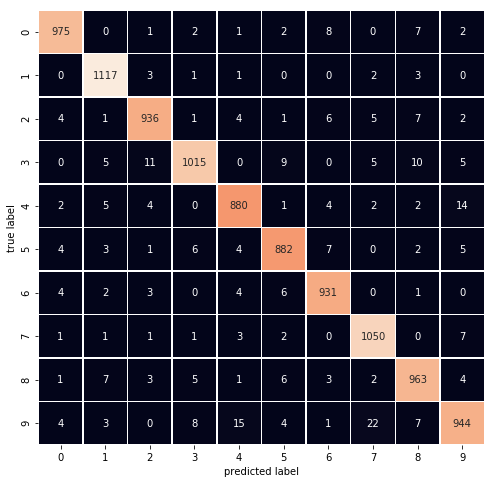

In [54]:
pred_val_dense2 = model_dense_2.predict_classes(X_val)
plot_confusion_matrix(y_val, pred_val_dense2)
print(classification_report(y_val, pred_val_dense2))
acc_fc2 = accuracy_score(y_val, pred_val_dense2)
print(acc_fc2)

In [55]:
def dense_model_3():
    
    model = Sequential()  
    model.add(Dense(100, activation='relu', input_dim=784))
    model.add(Dense(200, activation='relu')) 
    model.add(Dense(100, activation='relu')) 
    model.add(Dense(10, activation='softmax'))
         
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    #model.compile(optimizer=RMSprop(lr=0.001),
    #         loss='categorical_crossentropy',
    #         metrics=['accuracy'])
    
    return model

In [56]:
model_dense_3 = dense_model_3()
model_dense_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 119,810
Trainable params: 119,810
Non-trainable params: 0
_________________________________________________________________


Train on 30000 samples, validate on 10000 samples
Epoch 1/50
30000/30000 [==============================] - 1s 43us/step - loss: 1.6207 - acc: 0.5555 - val_loss: 0.7922 - val_acc: 0.8095
Epoch 2/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.5324 - acc: 0.8552 - val_loss: 0.3672 - val_acc: 0.8914
Epoch 3/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.3404 - acc: 0.9015 - val_loss: 0.2864 - val_acc: 0.9151
Epoch 4/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.2773 - acc: 0.9190 - val_loss: 0.2530 - val_acc: 0.9240
Epoch 5/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.2379 - acc: 0.9301 - val_loss: 0.2213 - val_acc: 0.9347
Epoch 6/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.2124 - acc: 0.9376 - val_loss: 0.2044 - val_acc: 0.9399
Epoch 7/50
30000/30000 [==============================] - 1s 29us/step - loss: 0.1919 - acc: 0.9431 - val_loss: 0.1896 - val_acc

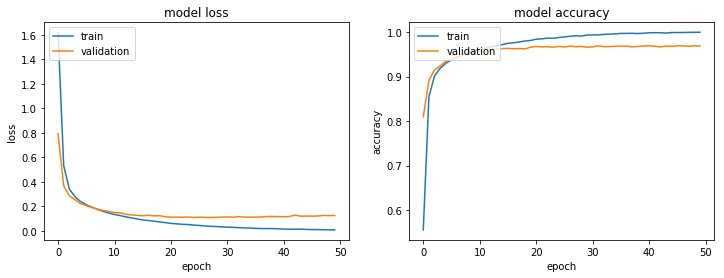

In [57]:
history_dense_3 = model_dense_3.fit(X_train, y_train, validation_data=(X_val,y_val_10), 
                                    epochs=50, batch_size=batchsize)
plot_history_loss_and_acc(history_dense_3)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       998
           1       0.98      0.99      0.98      1127
           2       0.97      0.97      0.97       967
           3       0.98      0.96      0.97      1060
           4       0.97      0.96      0.96       914
           5       0.96      0.96      0.96       914
           6       0.97      0.98      0.97       951
           7       0.97      0.98      0.97      1066
           8       0.96      0.97      0.96       995
           9       0.95      0.94      0.95      1008

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

0.9688


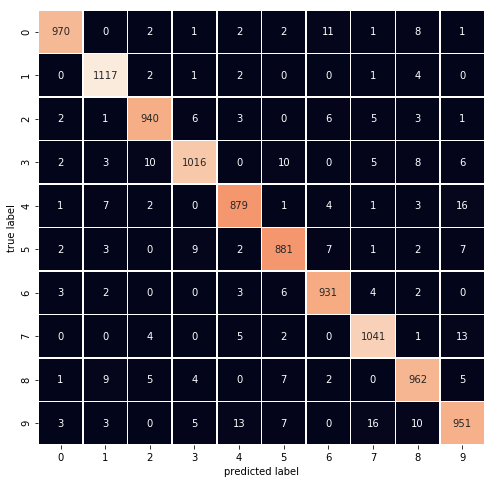

In [58]:
pred_val_dense3 = model_dense_3.predict_classes(X_val)
plot_confusion_matrix(y_val, pred_val_dense3)
print(classification_report(y_val, pred_val_dense3))
acc_fc3 = accuracy_score(y_val, pred_val_dense3)
print(acc_fc3)

In [59]:
X_train.shape

(30000, 784)

In [60]:
img_rows, img_cols = 28, 28

np.random.seed(5)

In [61]:
X_train = X_train.values.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.values.reshape(X_val.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

In [62]:
X_train.shape

(30000, 28, 28, 1)

In [63]:
y_train.shape

(30000, 10)

In [64]:
batchsize = 128
epochs = 12

In [65]:
activation = 'relu'
adadelta = Adadelta()
loss = categorical_crossentropy

In [66]:
def cnn_model_1(activation):
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation=activation, input_shape=input_shape)) 
    
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())

    model.add(Dense(128, activation=activation))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss=loss, optimizer=adadelta, metrics=['accuracy'])

    return model

In [67]:
model_cnn_1 = cnn_model_1(activation)
model_cnn_1.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1179776   
___________________________

In [68]:
history_cnn_1 = model_cnn_1.fit(X_train, y_train, validation_data=(X_val,y_val_10), 
                                   epochs=epochs, batch_size=batchsize, verbose=1)

Train on 30000 samples, validate on 10000 samples
Epoch 1/12
30000/30000 [==============================] - 6s 197us/step - loss: 0.3955 - acc: 0.8779 - val_loss: 0.1062 - val_acc: 0.9671
Epoch 2/12
30000/30000 [==============================] - 3s 91us/step - loss: 0.1205 - acc: 0.9646 - val_loss: 0.0603 - val_acc: 0.9814
Epoch 3/12
30000/30000 [==============================] - 3s 92us/step - loss: 0.0883 - acc: 0.9732 - val_loss: 0.0683 - val_acc: 0.9791
Epoch 4/12
30000/30000 [==============================] - 3s 92us/step - loss: 0.0704 - acc: 0.9780 - val_loss: 0.0433 - val_acc: 0.9873
Epoch 5/12
30000/30000 [==============================] - 3s 92us/step - loss: 0.0582 - acc: 0.9824 - val_loss: 0.0501 - val_acc: 0.9856
Epoch 6/12
30000/30000 [==============================] - 3s 92us/step - loss: 0.0524 - acc: 0.9843 - val_loss: 0.0416 - val_acc: 0.9872
Epoch 7/12
30000/30000 [==============================] - 3s 92us/step - loss: 0.0435 - acc: 0.9862 - val_loss: 0.0451 - val_ac

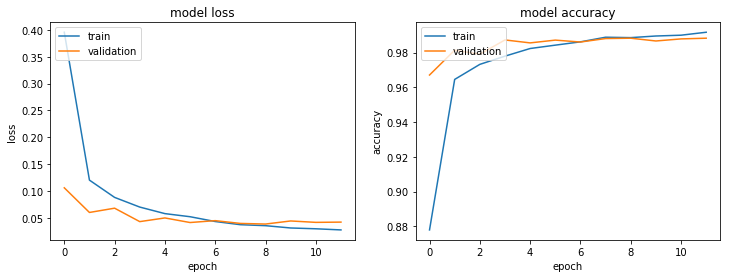

In [69]:
plot_history_loss_and_acc(history_cnn_1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       998
           1       1.00      1.00      1.00      1127
           2       0.98      0.99      0.99       967
           3       0.99      0.99      0.99      1060
           4       0.99      0.98      0.99       914
           5       0.97      1.00      0.99       914
           6       0.99      0.99      0.99       951
           7       0.98      0.99      0.99      1066
           8       0.99      0.99      0.99       995
           9       0.98      0.97      0.98      1008

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

0.9883


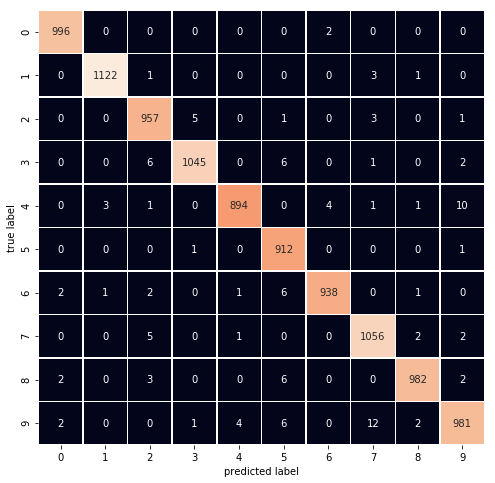

In [70]:
pred_val_cnn1 = model_cnn_1.predict_classes(X_val)
plot_confusion_matrix(y_val, pred_val_cnn1)
print(classification_report(y_val, pred_val_cnn1))
acc_cnn1 = accuracy_score(y_val, pred_val_cnn1)
print(acc_cnn1)

In [71]:
batch_size=90
epochs=30

In [72]:
def cnn_model_2(optimizer,loss):

    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding = 'Same', activation="relu", input_shape=input_shape ))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())

    model.add(Dense(256, activation=activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy']) 

    return model

In [73]:
model_cnn_2 = cnn_model_2(adadelta, categorical_crossentropy)
model_cnn_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               295168    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total para

Train on 30000 samples, validate on 10000 samples
Epoch 1/30
30000/30000 [==============================] - 3s 90us/step - loss: 0.3580 - acc: 0.8891 - val_loss: 0.1650 - val_acc: 0.9443
Epoch 2/30
30000/30000 [==============================] - 2s 72us/step - loss: 0.0826 - acc: 0.9737 - val_loss: 0.0740 - val_acc: 0.9775
Epoch 3/30
30000/30000 [==============================] - 2s 72us/step - loss: 0.0547 - acc: 0.9826 - val_loss: 0.0819 - val_acc: 0.9747
Epoch 4/30
30000/30000 [==============================] - 2s 72us/step - loss: 0.0398 - acc: 0.9877 - val_loss: 0.0871 - val_acc: 0.9719
Epoch 5/30
30000/30000 [==============================] - 2s 72us/step - loss: 0.0307 - acc: 0.9903 - val_loss: 0.0447 - val_acc: 0.9855
Epoch 6/30
30000/30000 [==============================] - 2s 72us/step - loss: 0.0243 - acc: 0.9929 - val_loss: 0.0397 - val_acc: 0.9879
Epoch 7/30
30000/30000 [==============================] - 2s 72us/step - loss: 0.0197 - acc: 0.9940 - val_loss: 0.0445 - val_acc

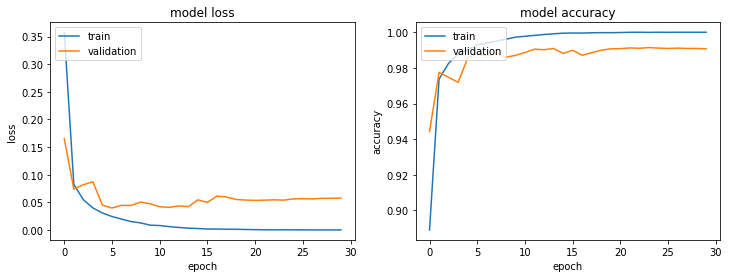

In [74]:
history_cnn_2 = model_cnn_2.fit(X_train, y_train, validation_data=(X_val,y_val_10), 
                                epochs=epochs, batch_size=batchsize, verbose=1)
plot_history_loss_and_acc(history_cnn_2)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       998
           1       0.99      1.00      1.00      1127
           2       0.99      0.99      0.99       967
           3       0.99      0.99      0.99      1060
           4       0.99      0.99      0.99       914
           5       0.99      0.99      0.99       914
           6       1.00      0.99      0.99       951
           7       0.99      0.99      0.99      1066
           8       0.99      0.99      0.99       995
           9       0.99      0.98      0.98      1008

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

0.9907


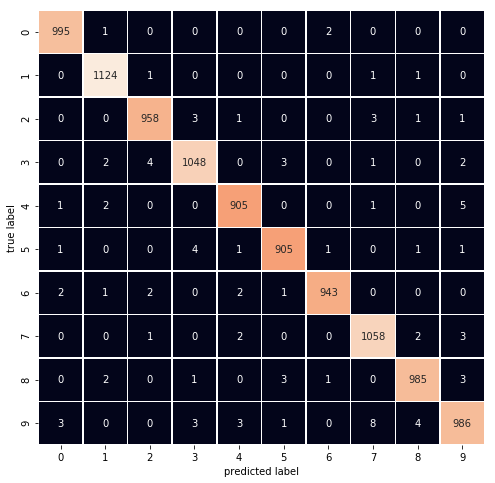

In [75]:
pred_val_cnn2 = model_cnn_2.predict_classes(X_val)
plot_confusion_matrix(y_val, pred_val_cnn2)
print(classification_report(y_val, pred_val_cnn2))
acc_cnn2 = accuracy_score(y_val, pred_val_cnn2)
print(acc_cnn2)

In [76]:
sample_submission = pd.read_csv('../input/sample_submission.csv')
if mode == "edit" :
    X = X[:nr_samples//2]
    y = y[:nr_samples//2]
    X_test = X_test[:nr_samples//2]
    sample_submission = sample_submission[:nr_samples//2]


In [77]:
print(X.shape)
print(y.shape)
print(X_test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [78]:
print(GridCV_Perceptron.best_params_)
GridCV_Perceptron.best_estimator_.fit(X,y)

{'penalty': 'l1', 'tol': 0.1}


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=0, shuffle=True, tol=0.1,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
pred_test_perc = GridCV_Perceptron.best_estimator_.predict(X_test)
result_perc = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_perc})
result_perc.to_csv("subm_perc.csv",index=False)

In [80]:
print(GridCV_LR.best_params_)
GridCV_LR.best_estimator_.fit(X,y)

{'C': 0.014, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.1}


LogisticRegression(C=0.014, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=0, solver='saga',
          tol=0.1, verbose=0, warm_start=False)

In [81]:
pred_test_lr = GridCV_LR.best_estimator_.predict(X_test)
result_lr = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_lr})
result_lr.to_csv("subm_lr.csv",index=False)

In [82]:
clf_knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [83]:
pred_test_knn = clf_knn.predict(X_test)
result_knn = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_knn})
result_knn.to_csv("subm_knn.csv",index=False)

In [84]:
print(GridCV_RF.best_params_)
GridCV_RF.best_estimator_.fit(X,y)

{'max_depth': 15, 'max_features': 100, 'min_samples_split': 5, 'n_estimators': 50}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [85]:
pred_test_rf = GridCV_RF.best_estimator_.predict(X_test)
result_rf = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_rf})
result_rf.to_csv("subm_rf.csv",index=False)

In [86]:
clf_svm.fit(X,y)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
pred_test_svm = clf_svm.predict(X_test)
result_svm = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_svm})
result_svm.to_csv("subm_svm.csv",index=False)

In [88]:
print(GridCV_MLP.best_params_)
GridCV_MLP.best_estimator_.fit(X,y)

{'alpha': 0.0001, 'batch_size': 2000, 'learning_rate_init': 0.06, 'max_iter': 600, 'solver': 'sgd', 'tol': 0.0001}


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=2000,
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.06, max_iter=600, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [89]:
pred_test_mlp = GridCV_MLP.best_estimator_.predict(X_test)
result_mlp = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_mlp})
result_mlp.to_csv("subm_mlp.csv",index=False)

In [90]:
y = to_categorical(y, 10)

In [91]:
model_dense_1.fit(X,y)
pred_test_fc1 = model_dense_1.predict_classes(X_test)
result_fc1 = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_fc1})
result_fc1.to_csv("dense_1.csv",index=False)

Epoch 1/1
42000/42000 [==============================] - 5s 114us/step - loss: 0.1157 - acc: 0.9649


In [92]:
model_dense_2.fit(X,y)
pred_test_fc2 = model_dense_2.predict_classes(X_test)
result_fc2 = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_fc2})
result_fc2.to_csv("dense_2.csv",index=False)

Epoch 1/1
42000/42000 [==============================] - 5s 122us/step - loss: 0.1154 - acc: 0.9645


In [93]:
model_dense_3.fit(X,y)
pred_test_fc3 = model_dense_3.predict_classes(X_test)
result_fc3 = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_fc3})
result_fc3.to_csv("dense_3.csv",index=False)

Epoch 1/1
42000/42000 [==============================] - 6s 133us/step - loss: 0.1451 - acc: 0.9578


In [94]:
X = X.values.reshape(X.shape[0], img_rows, img_cols, 1)
X_test = X_test.values.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [95]:
batchsize = 128
epochs = 12
model_cnn_1 = cnn_model_1('relu')
model_cnn_1.fit(X, y, epochs=epochs, batch_size=batchsize, verbose=0)

In [96]:
pred_test_cnn_1 = model_cnn_1.predict(X_test)
pred_test_cnn_1 = np.argmax(pred_test_cnn_1,axis=1)
result_cnn_1 = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_cnn_1})
result_cnn_1.to_csv("subm_cnn_1.csv",index=False)

In [97]:
batch_size=90
epochs=30
model_cnn_2 = cnn_model_2(adadelta, categorical_crossentropy)
model_cnn_2.fit(X, y, epochs=epochs, batch_size=batchsize, verbose=0)

In [98]:
pred_test_cnn_2 = model_cnn_2.predict(X_test)
pred_test_cnn_2 = np.argmax(pred_test_cnn_2,axis=1)
result_cnn_2 = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_cnn_2})
result_cnn_2.to_csv("subm_cnn_2.csv",index=False)

In [99]:
list_classifiers = ['PERC','LR','KNN','RF','SVM',
                    'MLP','DENSE1','DENSE2','DENSE3',
                    'CNN1','CNN2']

In [100]:
val_scores = [acc_perc, acc_lr, acc_knn, acc_rf, 
               acc_svm, acc_mlp, acc_fc1, acc_fc2, 
               acc_fc3, acc_cnn1, acc_cnn2]

In [101]:
test_scores = [score_perc, score_lr, score_knn, score_rf, score_svm, score_mlp,
               score_dns_1, score_dns_2, score_dns_3, score_cnn_1, score_cnn_2]


NameError: name 'score_perc' is not defined

In [102]:
trace1 = go.Scatter(x = list_classifiers, y = val_scores,
                   name="Validation", text = list_classifiers)
trace2 = go.Scatter(x = list_classifiers, y = test_scores,
                   name="Submission", text = list_classifiers)

data = [trace1, trace2]

layout = dict(title = "Validation and Submission Scores", 
              xaxis=dict(ticklen=10, zeroline= False),
              yaxis=dict(title = "Accuracy", side='left', ticklen=10,),                                  
              legend=dict(orientation="v", x=1.05, y=1.0),
              autosize=False, width=750, height=500,
              )

fig = dict(data = data, layout = layout)
iplot(fig)


NameError: name 'go' is not defined

In [103]:
model_cnn_2.optimizer

In [104]:
model_cnn_2_rmsprop = cnn_model_2(RMSprop(), categorical_crossentropy)
model_cnn_2_rmsprop.optimizer

In [105]:
model_cnn_2.fit(X, y, epochs=epochs, batch_size=batchsize, verbose=0)
pred_test_cnn_2 = model_cnn_2.predict(X_test)
pred_test_cnn_2 = np.argmax(pred_test_cnn_2,axis=1)
result_cnn_2 = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_cnn_2})
result_cnn_2.to_csv("subm_cnn_2_rmsprop.csv",index=False)

In [106]:
model_cnn_2_adam = cnn_model_2(Adam(), categorical_crossentropy)
model_cnn_2_adam.optimizer

In [107]:
model_cnn_2.fit(X, y, epochs=epochs, batch_size=batchsize, verbose=0)
pred_test_cnn_2 = model_cnn_2.predict(X_test)
pred_test_cnn_2 = np.argmax(pred_test_cnn_2,axis=1)
result_cnn_2 = pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':pred_test_cnn_2})
result_cnn_2.to_csv("subm_cnn_2_adam.csv",index=False)

In [108]:
arr_y_val = y_val.values
false_cnn2 = pred_val_cnn2 != arr_y_val

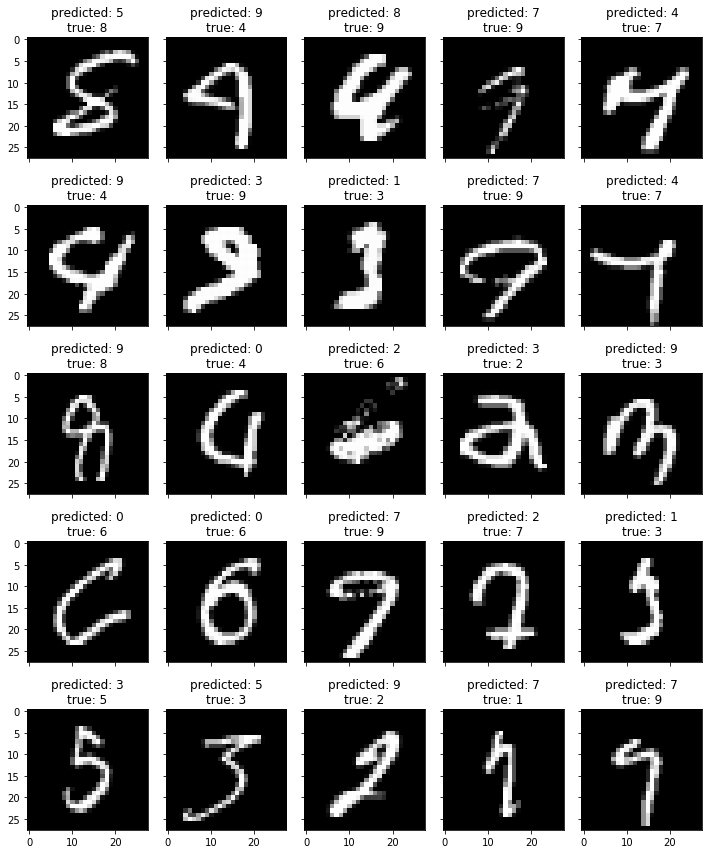

In [109]:
fig, axs = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(10,12))
axs = axs.flatten()
for i, n  in enumerate(false_cnn2[:25]):
    im = X_val[false_cnn2][i,:,:,0]
    axs[i].imshow(im, cmap=plt.get_cmap('gray'))
    title = ("predicted: " + str(pred_val_cnn2[false_cnn2][i]) + 
            "\n" + "true: " + str(arr_y_val[false_cnn2][i]) )
    axs[i].set_title(title)
plt.tight_layout()    